In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Part 1: Matplotlib

In [22]:
# Brazil, Nigeria, Sweden, USA, Vietnam
csv_files = [
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-bra--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-nga--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-swe--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv",
    "ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-vnm--age--gender--year.csv"
]

dfs = []

# read each file and append the df to list
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

,country,age,gender,year,population
0,bra,0,1,1950,1103864
1,bra,0,1,1951,1133790
2,bra,0,1,1952,1169236
3,bra,0,1,1953,1204207
4,bra,0,1,1954,1239304
...,...,...,...,...,...
152505,vnm,99,2,2096,70597
152506,vnm,99,2,2097,67367
152507,vnm,99,2,2098,67264
152508,vnm,99,2,2099,71487


1. Create a line plot comparing total population over time:
    - Choose 5 countries
    - Calculate the total population by country for each year
    - Create a line plot showing population trends
    - Include a legend identifying each country
    - Add appropriate axis labels and title
    - Use different line styles or colors to distinguish the countries

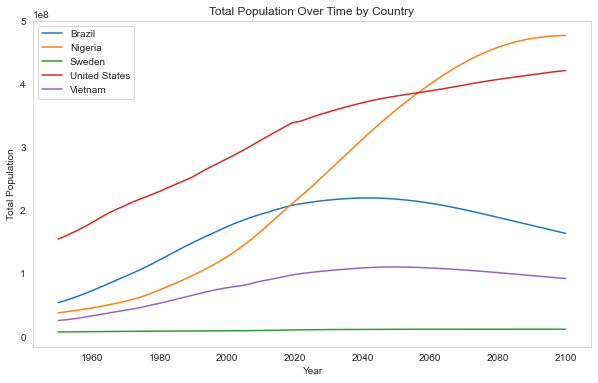

In [89]:
total_pop = combined_df.groupby(['country', 'year'])['population'].sum().reset_index() # calculate total population

plt.figure(figsize=(10, 6))

for country in total_pop['country'].unique():
    country_data = total_pop[total_pop['country'] == country]
    plt.plot(country_data['year'], country_data['population'], label=country) # plotting each line on figure
    
plt.grid() 
plt.title('Total Population Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend(labels = ['Brazil', 'Nigeria', 'Sweden', 'United States', 'Vietnam'])  


2. Investigate demographic shifts using a stacked bar chart:
    - Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
    - Create a stacked bar chart showing these changes
    - Calculate and display the percentage for each age group
    - Add text annotations showing key percentages
    - Include clear labels and a legend

/var/folders/m3/cjk44zyd71sd0l71hpnfvwwc0000gn/T/ipykernel_78394/3064854884.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age_group'] = pd.cut(filtered_df['age'], bins=bins, labels=age_groups, right=True)


<Figure size 720x432 with 0 Axes>

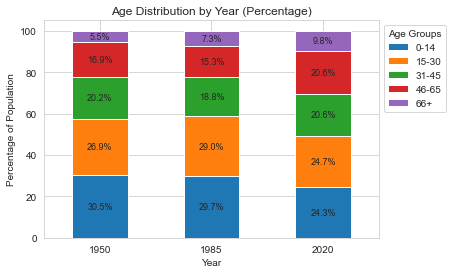

In [90]:
years = [1950, 1985, 2020]
bins = [0, 14, 30, 45, 65, 100]
age_groups = ['0-14', '15-30', '31-45', '46-65', '66+']

filtered_df = combined_df[combined_df['year'].isin(years)]

# add column of corresponding age group bin
filtered_df['age_group'] = pd.cut(filtered_df['age'], bins=bins, labels=age_groups, right=True) 

# calculate percentage 
age_distribution = filtered_df.groupby(['year', 'age_group'])['population'].sum().unstack(fill_value=0)
age_distribution_percentage = age_distribution.div(age_distribution.sum(axis=1), axis=0) * 100

# create stacked bar plot
plt.figure(figsize=(10, 6))
stackedbar = age_distribution_percentage.plot(kind='bar', stacked = 'True')

plt.title("Age Distribution by Year (Percentage)")
plt.xlabel("Year")
plt.ylabel("Percentage of Population")
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title="Age Groups", bbox_to_anchor=(1, 1))

# sdding annotations 
for bars in stackedbar.containers:  # iterate through each set of bars
    stackedbar.bar_label(bars, label_type='center', fontsize=9, fmt='%.1f%%')

Part Two: Seaborn

1. Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.
    Use seaborn's heatmap function
    Add clear annotations and labels
    Write a brief explanation of what the heatmap reveals about the population structure

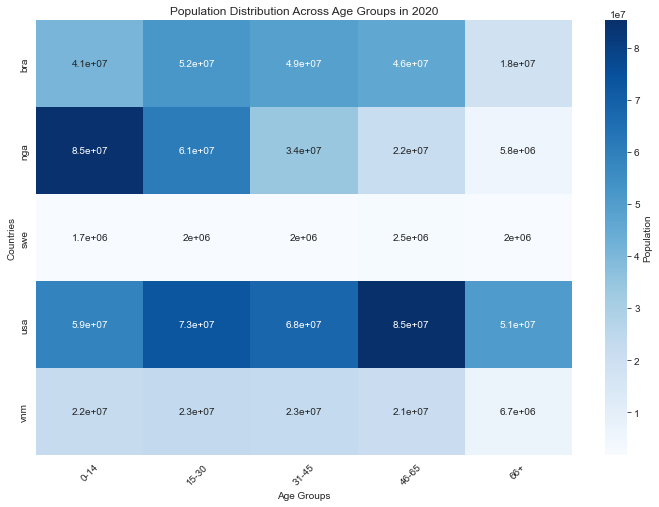

In [65]:
# filter for 2008
yr = 2008
combined_df['age_group'] = pd.cut(combined_df['age'], bins=bins, labels=age_groups, right=True)
filtered_df = combined_df[combined_df['year'] == yr]
aggregated_df = filtered_df.groupby(['country', 'age_group'], as_index=False)['population'].sum()

# pivot the data for the heatmap
heatmap_data = aggregated_df.pivot("country", "age_group", "population")

# create heatmap
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
# sns.color_palette("husl", 8)
sns.heatmap(heatmap_data, annot=True, cmap= "Blues", cbar_kws={'label': 'Population'})

# add labels and title
plt.title(f"Population Distribution Across Age Groups in {yr}")
plt.xlabel("Age Groups")
plt.ylabel("Countries")
plt.xticks(rotation=45)
plt.show()

Sweden has the lowest population distribution across all of the age groups compared to the other 4 countries, but has a fairly even population size for each age group. Vietnam also has a relatively small population size, but the distribution is similar across all ages, except 66+ where the population size is the lowest. The United States has the largest population distribution across all age groups except for 0-14 years old, where Nigeria has the highest population.

2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.
    - Create side-by-side violin plots using seaborn
    - Add clear labels and a title
    - Write a brief comparison of what the plots reveal

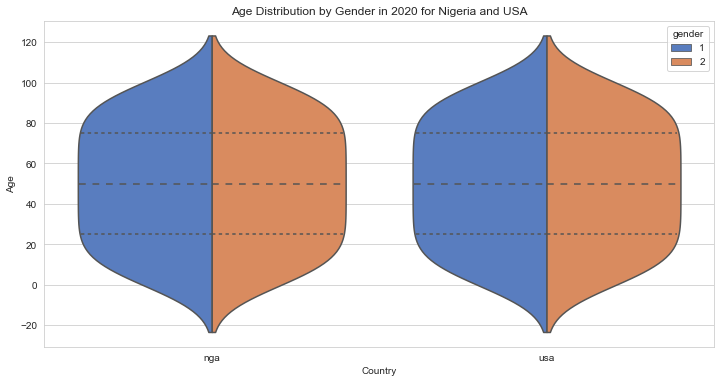

In [88]:
# filter for Nigeria and USA
two_countries = ['nga', 'usa']
filtered_df = combined_df[(combined_df['year'] == 2020) & 
                          (combined_df['country'].isin(two_countries))]

# create violin plot and add labels
plt.figure(figsize=(12, 6))
sns.violinplot(x='country', y='age', hue='gender', data=filtered_df, split=True,inner='quartile', palette='muted')
plt.title('Age Distribution by Gender in 2020 for Nigeria and USA')
plt.xlabel('Country')
plt.ylabel('Age')
plt.show()

This violin plot shows that the age distribution across both genders between Nigeria and USA are very similar.

3. Create a pairplot comparing population metrics across four countries:
    - Select four countries of your choice
    - Include all variables in the dataset
    - Use the country as the hue parameter to distinguish between countries
    - Write a brief summary of any patterns or relationships revealed by the pairplot

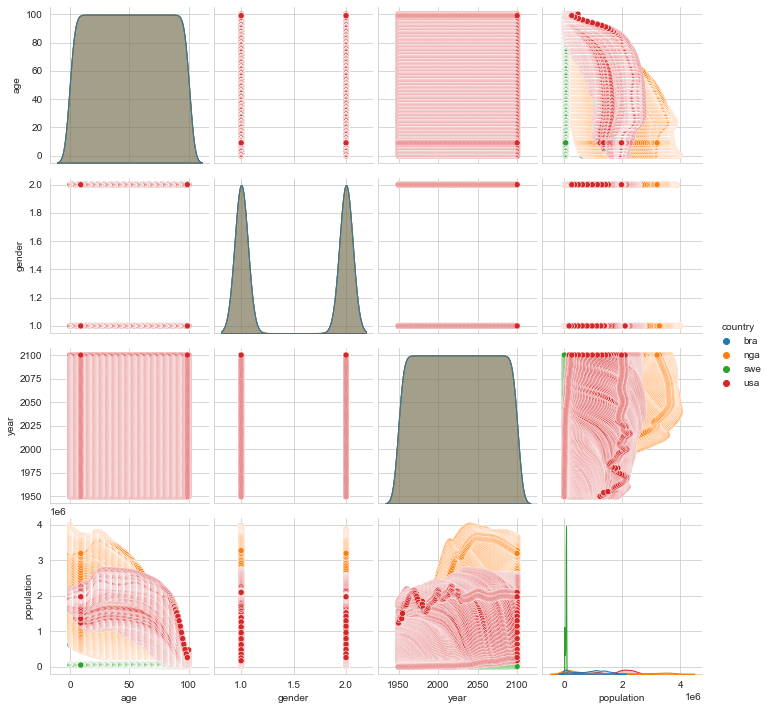

In [87]:
# filter for Brazil, Nigeria, Sweden, USA
four_countries = ['bra', 'nga', 'swe', 'usa']  
filtered_df = combined_df[combined_df['country'].isin(four_countries)]

sns.pairplot(filtered_df, hue='country')
plt.show()

This pairplot shows that as time passed, the population increased significantly for all of the countries, but particularly for Nigeria. We can also see that as age increases, population decreases as well.